In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def plot_curves_exact(env_name, algorithm_name, num_iteration=1, is_warm_start=False, weak_warm_start="", seed=0, base=False, max_x=1e8):
    save_prefix = "/root/data/results"
    # kuhn_poker_PDO_100_wsFalse_0_exps.npy
    # '/root/data/results/' + self.algorithm + str(self.meta_iterations) + '_' + self.game_name + f'_{seed}'
    # lcfr_liars_dice_0__exps.npy

    if base:
        data_filename = f"{save_prefix}/{algorithm_name}_{env_name}_{seed}__exps.npy"
        x_filename = f"{save_prefix}/{algorithm_name}_{env_name}_{seed}__infostates.npy"
    else:
        data_filename = f"{save_prefix}/{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}{weak_warm_start}_{seed}_exps.npy"
        x_filename = f"{save_prefix}/{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}{weak_warm_start}_{seed}_infostates.npy"

    seed_data = np.load(data_filename)
    x_values = np.load(x_filename)

    selected_inds = x_values < max_x

    plt.plot(x_values[selected_inds], seed_data[selected_inds], label=f'{algorithm_name}_{num_iteration}_ws{is_warm_start}{weak_warm_start}')


EXP plotting

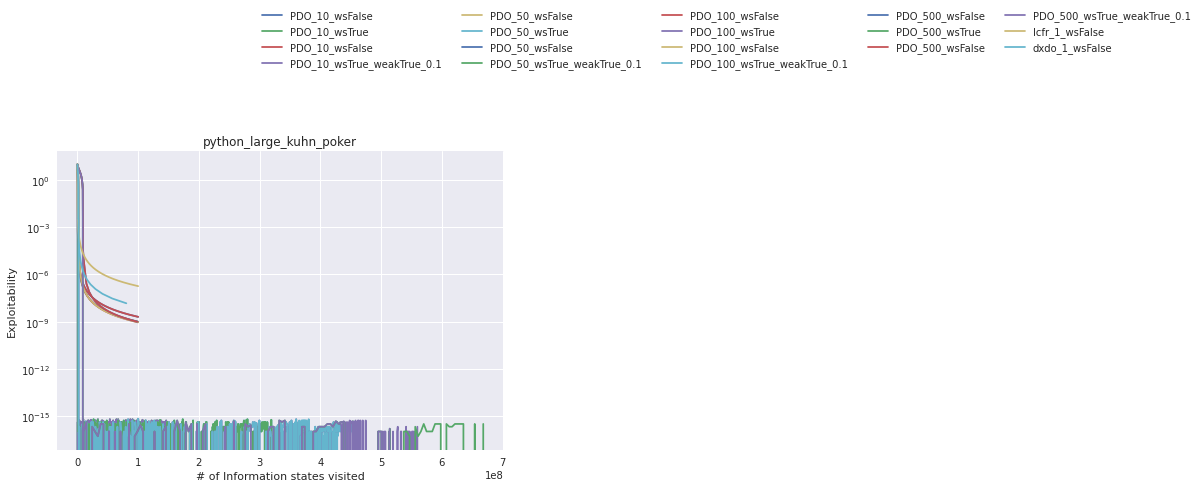

In [ ]:
# Example usage:
num_seeds = 100  # Replace with the actual number of seeds
env_name = "your_env_name"  # Replace with your environment name
algorithm_name = "your_algorithm_name"  # Replace with your algorithm name
num_iteration = 1000  # Replace with the number of iterations
is_warm_start = True  # Replace with True or False as needed
legend_done = False

for env_name in ["python_large_kuhn_poker", "liars_dice", "leduc_poker", "leduc_poker_dummy", "kuhn_poker", "oshi_zumo"]:
    plt.cla()
    for algorithm_name in ["PDO"]:
        for num_iteration in [10, 50, 100, 500]:
            for weak_warm_start in ["", "_weakTrue_0.1"]:
                plot_curves_exact(env_name, 
                                  algorithm_name, 
                                  num_iteration, 
                                  is_warm_start=False, 
                                  max_x=1e8)
                plot_curves_exact(env_name, 
                                  algorithm_name, 
                                  num_iteration, 
                                  is_warm_start=True,
                                  weak_warm_start=weak_warm_start, 
                                  max_x=1e8)
#             get_support(env_name, algorithm_name, num_iteration, is_warm_start=False)
    
    plot_curves_exact(env_name, "lcfr", base=True)
    plot_curves_exact(env_name, "dxdo", base=True)
    
    plt.yscale("log")
    plt.xlabel('# of Information states visited')
    plt.ylabel('Exploitability')
    plt.title(f'{env_name}')
    if not legend_done:
        plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.5), fancybox=True, shadow=True, ncol=5)
        legend_done = True
    plt.grid(True)
    plt.show()


Plot error bar

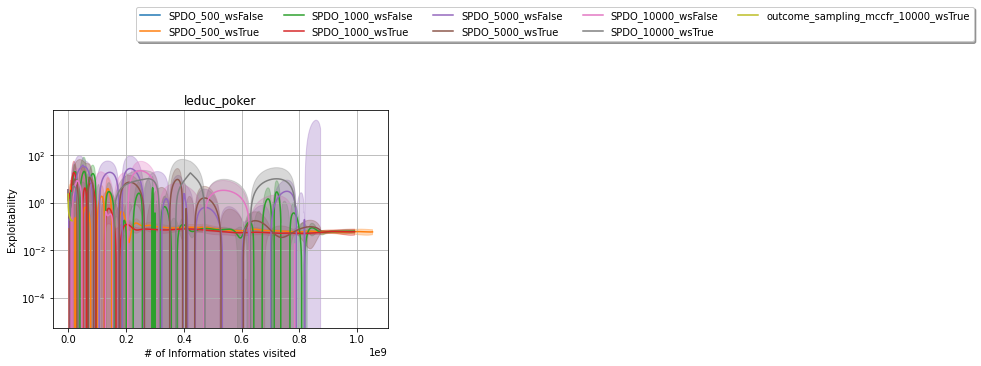

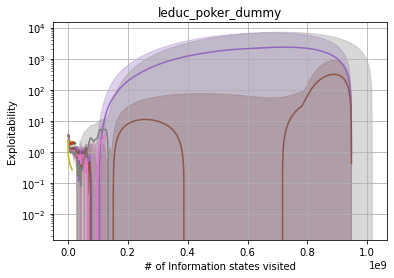

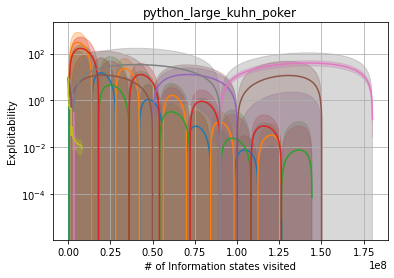

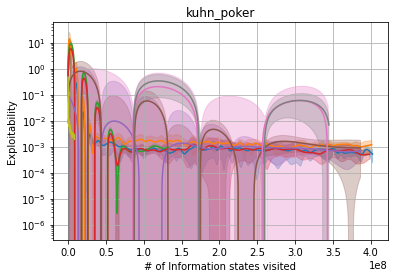

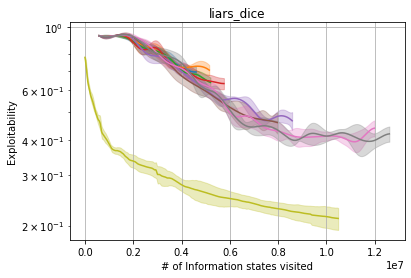

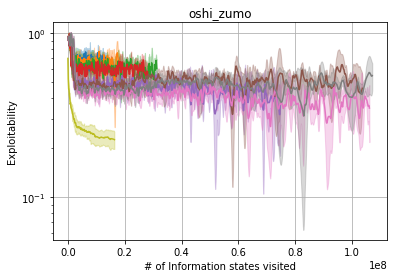

In [4]:
import pickle
import matplotlib

def plot_mean_curve_with_error_bars(num_seeds, env_name, algorithm_name, num_iteration, is_warm_start, color, base=False):
    save_prefix = '/root/data/results/'
    # Initialize lists to store interpolated data for each seed
    interp_seeds = []
    seed_x_values = []

    for seed in range(0, num_seeds):
        # Generate filenames based on the provided format

        if base:
            data_filename = save_prefix + algorithm_name + '_' + env_name + f"_{seed}__exps.npy"
            x_filename = save_prefix + algorithm_name + '_' + env_name + f"_{seed}__infostates.npy"

        else:
            # f'/root/data/results/{self.game_name}_{self.algorithm}_{self.meta_iterations}_ws{self.is_warm_start}_{seed}'
            data_filename = f'{save_prefix}{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_exps.npy'
            x_filename = f'{save_prefix}{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_infostates.npy'
   
        # Load data for each seed and its corresponding x-values
        seed_data = np.load(data_filename)
        x_values = np.load(x_filename)
#         print(x_filename)
        # x_values = pickle.load(open(x_filename,'rb'))
        
        interp = interp1d(x_values, seed_data, kind='cubic')
        interp_seeds.append(interp)
        seed_x_values.append(x_values)

    # Find the minimum and maximum x-values across all seeds
    min_x = max([np.min(x) for x in seed_x_values])
    max_x = min([np.max(x) for x in seed_x_values])

    # Generate a sequence of x-values from min_x to max_x
    x_sequence = np.linspace(min_x, max_x, num=1000)  # You can adjust the num parameter for the desired number of points

    # Initialize arrays to store mean and standard deviation
    mean_data = np.zeros(len(x_sequence))
    std_dev_data = np.zeros(len(x_sequence))

    # Calculate the mean and standard deviation at each x-value
    for i, x in enumerate(x_sequence):
        values_at_x = [interp(x) for interp in interp_seeds]
        mean_data[i] = np.mean(values_at_x)
        std_dev_data[i] = np.std(values_at_x)

    # Plot the curve with error bars
    plt.plot(x_sequence, mean_data, label=f'{algorithm_name}_{num_iteration}_ws{is_warm_start}', color=color)
    plt.fill_between(x_sequence, mean_data - std_dev_data, mean_data + std_dev_data, alpha=0.3, color=color)

# colors = generate_distinct_colors(50)
colors = matplotlib.cm.tab10(range(10))

# Example usage:
num_seeds = 100  # Replace with the actual number of seeds
env_name = "your_env_name"  # Replace with your environment name
algorithm_name = "your_algorithm_name"  # Replace with your algorithm name
num_iteration = 1000  # Replace with the number of iterations
is_warm_start = True  # Replace with True or False as needed
legend_done = False

for env_name in ["leduc_poker", "leduc_poker_dummy", "python_large_kuhn_poker", "kuhn_poker", "liars_dice", "oshi_zumo"]:
    plt.cla()
    i = 0
    for algorithm_name in ["SPDO"]:
        for num_iteration in [500, 1000, 5000, 10000]:
            plot_mean_curve_with_error_bars(5, env_name, algorithm_name, num_iteration, False, colors[i])
            i += 1
            plot_mean_curve_with_error_bars(5, env_name, algorithm_name, num_iteration, True, colors[i])
            i += 1
    
    plot_mean_curve_with_error_bars(5, env_name, "outcome_sampling_mccfr", num_iteration, True, colors[i], True)
    
    plt.yscale("log")
    plt.xlabel('# of Information states visited')
    plt.ylabel('Exploitability')
    plt.title(f'{env_name}')
    if not legend_done:
        plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.5), fancybox=True, shadow=True, ncol=5)
        legend_done = True
    plt.grid(True)
    plt.show()


Support plotting

NameError: name 'save_prefix' is not defined

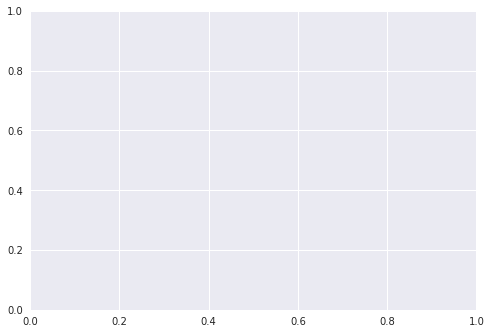

In [5]:
def get_support(env_name, algorithm_name, num_iteration, is_warm_start, seed=0):
    
    # kuhn_poker_PDO_100_wsFalse_0_exps.npy
    data_filename = f"{save_prefix}/{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_infos.npy"
    return np.load(data_filename)[2]

def get_support_baselines(env_name, algorithm_name, seed=0):
    
    # kuhn_poker_PDO_100_wsFalse_0_exps.npy
    data_filename = f"{save_prefix}/{algorithm_name}_{env_name}_{seed}__infos.npy"
    return np.load(data_filename)[0]

# Example usage:
num_seeds = 100  # Replace with the actual number of seeds
env_name = "your_env_name"  # Replace with your environment name
algorithm_name = "your_algorithm_name"  # Replace with your algorithm name
num_iteration = 1000  # Replace with the number of iterations
is_warm_start = True  # Replace with True or False as needed
plt.style.use("seaborn")

for env_name in ["liars_dice", "leduc_poker", "leduc_poker_dummy", "oshi_zumo", "kuhn_poker"]:
    plt.cla()
    supports = []
    names = []
    
    for algorithm_name in ["PDO"]:
        for num_iteration in [10, 50, 100, 500]:
            supports.append(get_support(env_name, algorithm_name, num_iteration, is_warm_start=False))
            names.append(f"{algorithm_name}_{num_iteration}")
    
    supports.append(get_support_baselines(env_name, "lcfr"))
    names.append(f"lcfr")
    
    plt.bar(names, supports)
    plt.yscale("log")
    plt.xlabel('Algorithm')
    plt.ylabel('Average support')
    plt.title(f'{env_name}')
    plt.show()


Error bar plotting

In [ ]:
import numpy as np
import os
import pickle
data_filename = "/root/data/results/outcome_sampling_mccfr_kuhn_poker_0__exps"

# test = pickle.load(open(data_filename,'rb'))
# test = np.load(data_filename)
# print(test)

# os.system("python baselines.py --algorithm outcome_sampling_mccfr")

# Generate an array of distinct colors with a specified length
def generate_distinct_colors(num_colors):
    # Create a color map from the 'tab20' colormap in Matplotlib
    cmap = plt.get_cmap('tab20')
    
    # Get a range of colors from the colormap
    colors = [cmap(i) for i in np.linspace(0, 1, num_colors)]
    
    return colors